In [56]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from simulation import Simulation
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import ticker

In [57]:
# year, black, pov, smoking state

In [79]:
# data_files = sorted(glob('../../outputs/numpy_arrays/*'))
# data_files

In [59]:
arr2 = np.load("../../outputs/numpy_arrays/np_output_calibrated_2022-10-05_02-14-55-160843.npy")
# arr = np.load(data_files[-3])
arr = np.load(glob(f"../../outputs/numpy_arrays/np_output_calibrated_to_NHIS_5.5*")[0])

In [60]:
arr.shape

(51, 2, 2, 6)

In [61]:

arr_year_smoking_state = None
arr2_year_smoking_state = None

arr_year_smoking_state = np.sum(arr,axis=(1,2))
arr2_year_smoking_state = np.sum(arr2,axis=(1,2))
arr_year_smoking_state.shape

(51, 6)

In [62]:
arr_year_smoking_state /= 1e6
arr2_year_smoking_state /= 1e6

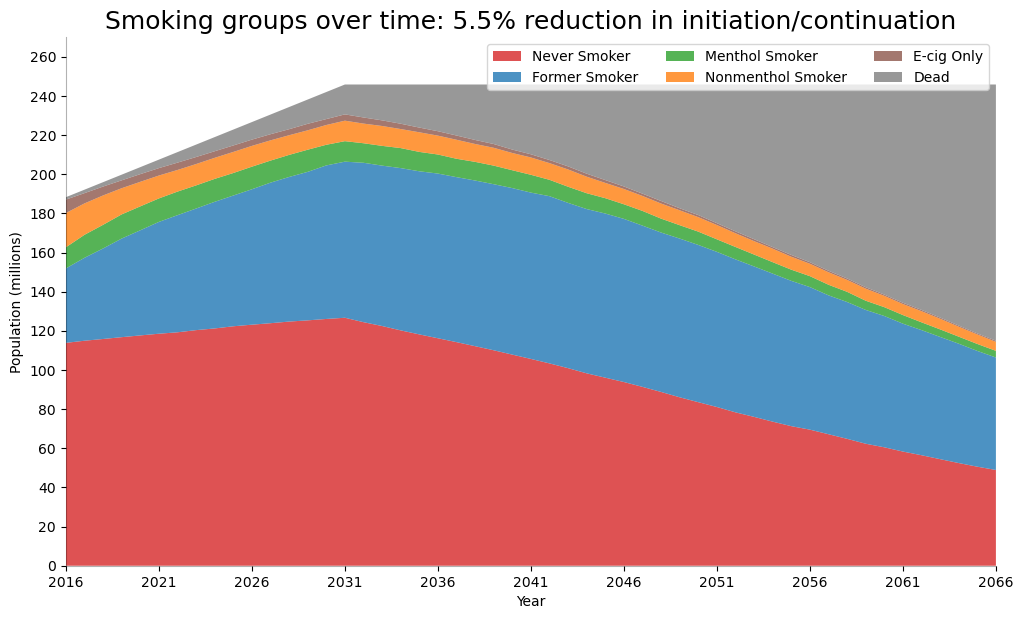

In [72]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(12,7), dpi=100)
labels = ["Never Smoker", "Former Smoker", "Menthol Smoker", "Nonmenthol Smoker", "E-cig Only", "Dead"]

x = np.arange(2016, 2016 + arr_year_smoking_state.shape[0])
y = np.vstack([arr_year_smoking_state[:,i] for i in range(arr_year_smoking_state.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=labels, colors=mycolors, alpha=0.8)

# for i in x:
#     ax.axvline(x=i, c="black")

ax.set_title('Smoking groups over time: 5.5% reduction in initiation/continuation', fontsize=18)
ax.set(ylim=[0, 2.7e2])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,2.7e2,2e1,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


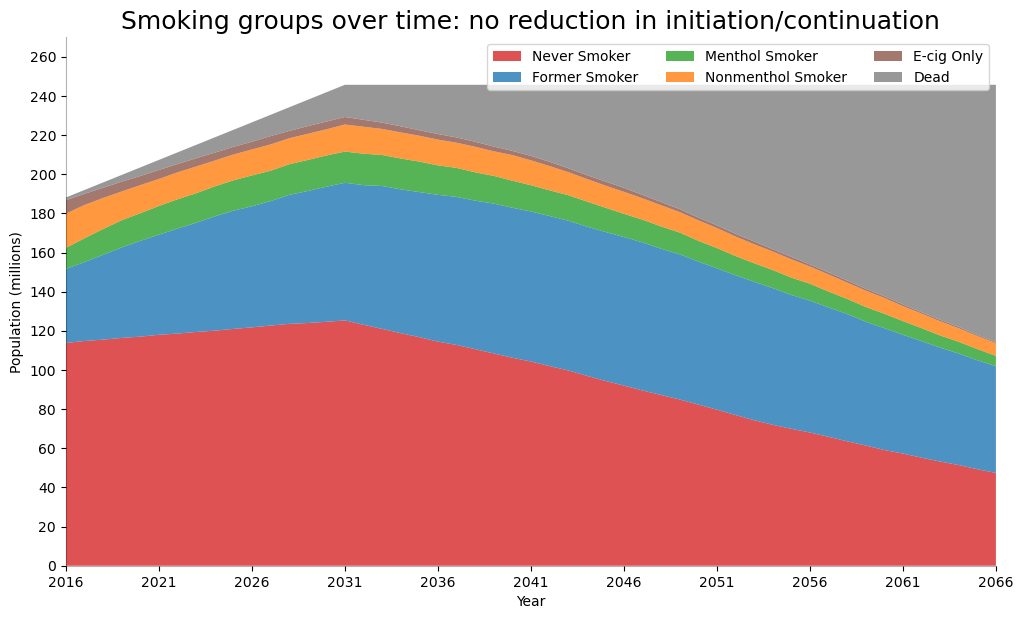

In [73]:

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(12,7), dpi=100)
labels = ["Never Smoker", "Former Smoker", "Menthol Smoker", "Nonmenthol Smoker", "E-cig Only", "Dead"]

x = np.arange(2016, 2016 + arr2_year_smoking_state.shape[0])
y = np.vstack([arr2_year_smoking_state[:,i] for i in range(arr2_year_smoking_state.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=labels, colors=mycolors, alpha=0.8)

# for i in x:
#     ax.axvline(x=i, c="black")

ax.set_title('Smoking groups over time: no reduction in initiation/continuation', fontsize=18)
ax.set(ylim=[0, 2.7e2])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,2.7e2,2e1,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


In [74]:
arr_year_smoking_state.shape

(51, 6)

In [75]:
arr_no_dead = arr_year_smoking_state[:,:-1]
arr2_no_dead = arr2_year_smoking_state[:,:-1]
arr_no_dead.shape

(51, 5)

In [76]:
arr_no_dead_percents = arr_no_dead / np.sum(arr_no_dead, axis=1).reshape(-1,1) * 100
arr2_no_dead_percents = arr2_no_dead / np.sum(arr2_no_dead, axis=1).reshape(-1,1) * 100
arr_no_dead_percents[10,:]

array([56.57017773, 31.78006911,  5.30374579,  4.87776868,  1.46823869])

Text(0.5, 1.0, 'Proportion of smoking groups in the population: 5.5% reduction in initiation/continuation')

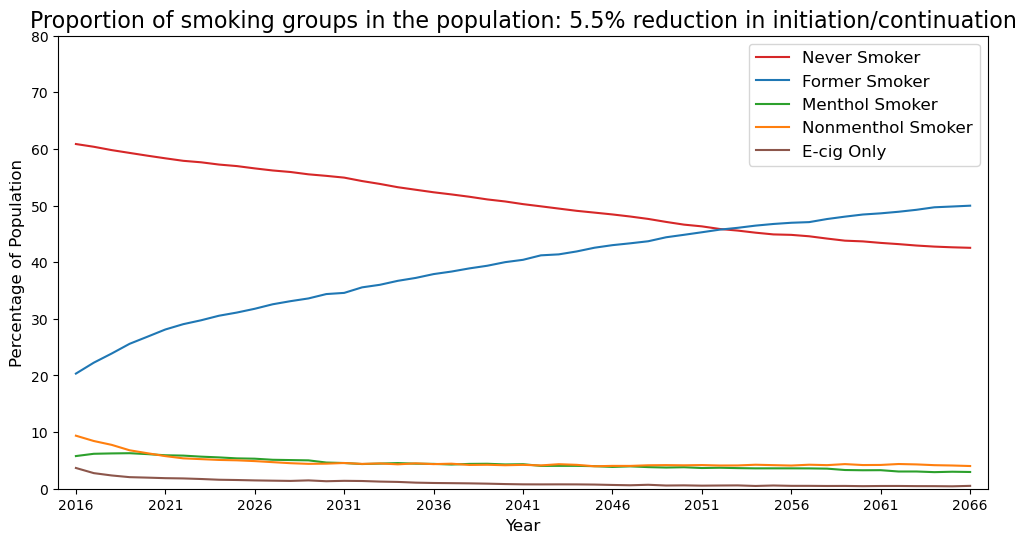

In [82]:
fig, ax = plt.subplots(1,1,figsize=(12,6), dpi=100)
ax.plot(x, arr_no_dead_percents[:,0], mycolors[0],
        x, arr_no_dead_percents[:,1], mycolors[1],
        x, arr_no_dead_percents[:,2], mycolors[2],
        x, arr_no_dead_percents[:,3], mycolors[3],
        x, arr_no_dead_percents[:,4], mycolors[4])

plt.ylim(0,80)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels, fontsize=12, ncol=1)

plt.title("Proportion of smoking groups in the population: 5.5% reduction in initiation/continuation", fontsize=16)

# for i in range(len(mycolors)-1):
#         ax.get_lines()[i].set_color(mycolors[i])

# len(ax.get_lines())
# len(mycolors)

Text(0.5, 1.0, 'Proportion of smoking groups in the population: no reduction in initiation/continuation')

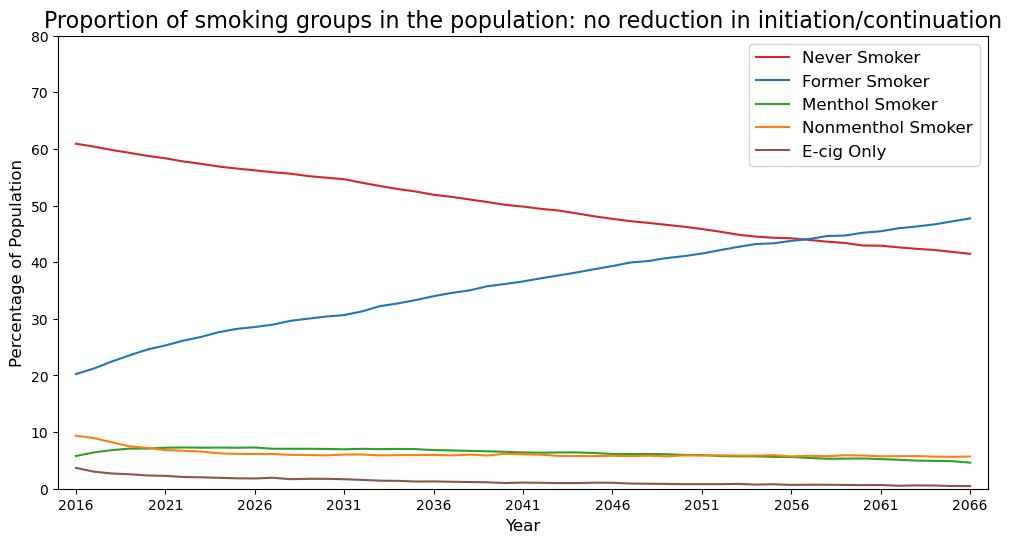

In [84]:

fig, ax = plt.subplots(1,1,figsize=(12,6), dpi=100)
ax.plot(x, arr2_no_dead_percents[:,0], mycolors[0],
        x, arr2_no_dead_percents[:,1], mycolors[1],
        x, arr2_no_dead_percents[:,2], mycolors[2],
        x, arr2_no_dead_percents[:,3], mycolors[3],
        x, arr2_no_dead_percents[:,4], mycolors[4])

plt.ylim(0,80)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels, fontsize=12, ncol=1)

plt.title("Proportion of smoking groups in the population: no reduction in initiation/continuation", fontsize=16)


Text(0.5, 1.0, 'Effect of menthol ban on proportion of smokers')

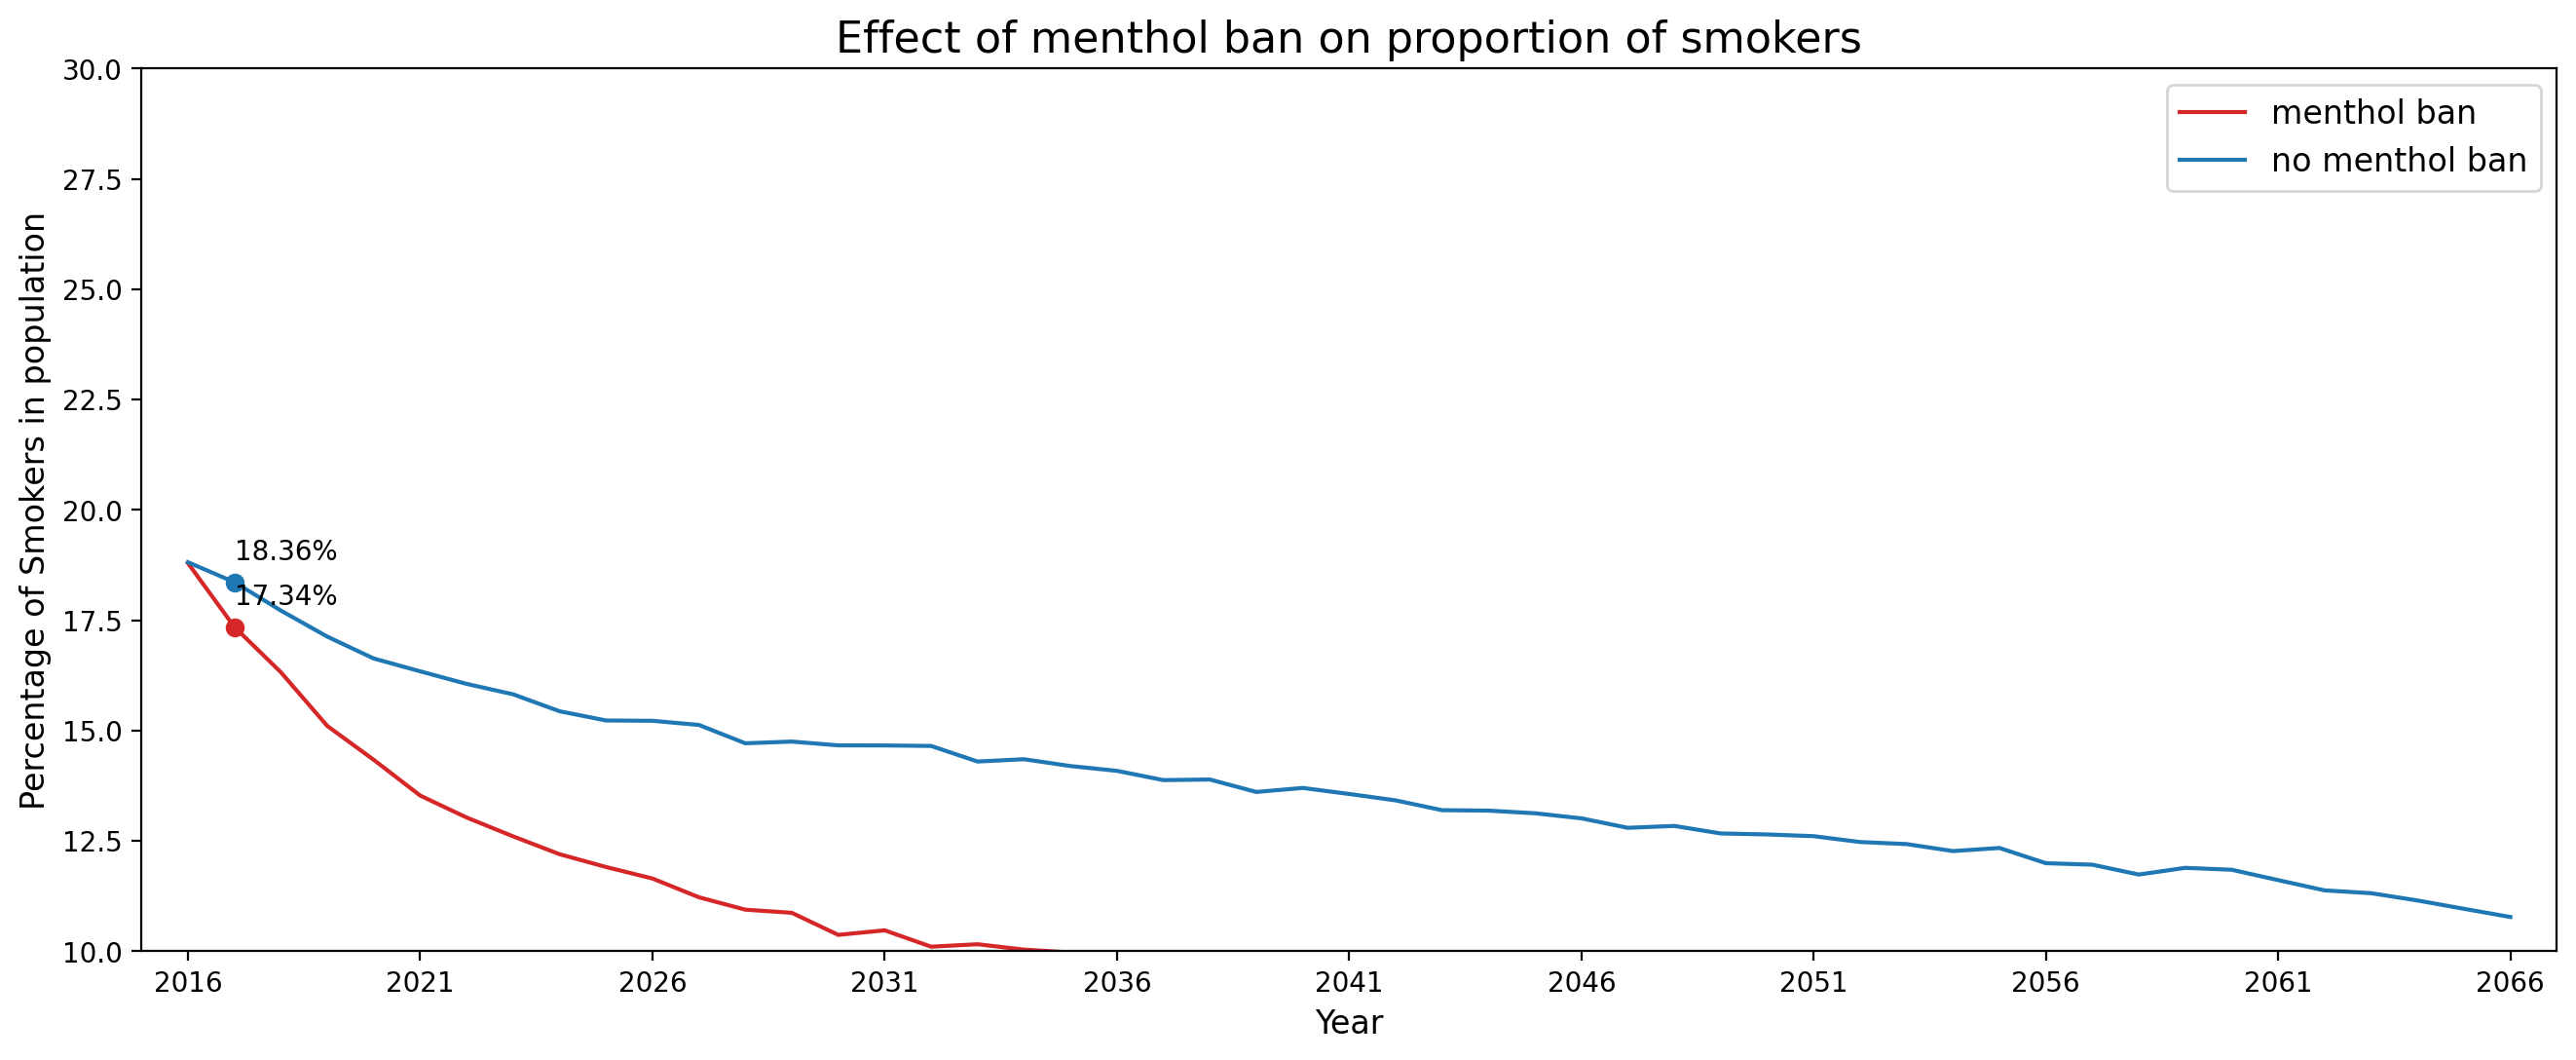

In [69]:
fig, ax = plt.subplots(1,1,figsize=(16,6), dpi=200)
y = np.sum(arr_no_dead_percents[:,2:], axis=1)
y2 = np.sum(arr2_no_dead_percents[:,2:], axis=1)

ax.plot(x, y, mycolors[0])
ax.plot(x, y2, mycolors[1])

plt.ylim(10,30)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Smokers in population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
# ax.legend(["complex death rate", "average death rate"], fontsize=12, ncol=1)
ax.legend(["menthol ban", "no menthol ban"], fontsize=12, ncol=1)
for i,j in zip(x, y):
    # if (i - 2016) % 5 == 0 and i > 2040:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i,j+0.5))
        ax.scatter([i],[j],c=mycolors[0])
for i,j in zip(x, y2):
    # if (i - 2016) % 5 == 0 and i > 2040:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i,j+0.5))
        ax.scatter([i],[j],c=mycolors[1])

# plt.title("Proportion of smokers in the living population", fontsize=16)
plt.title("Effect of menthol ban on proportion of smokers", fontsize=16)


In [70]:
print(arr_no_dead_percents[:,3][:10])
print(np.sum(arr_no_dead_percents[:,2:], axis=1)[:10])

[9.36512383 8.42610114 7.74592635 6.79073181 6.2679666  5.75742142
 5.36575515 5.22504815 5.08275582 5.01503755]
[18.79533262 17.34865    16.32348249 15.10550618 14.33867357 13.52869843
 13.03161225 12.60458646 12.20058552 11.91076628]


Text(0.5, 1.0, 'Effect of menthol ban on proportion of menthol smokers in smoking population')

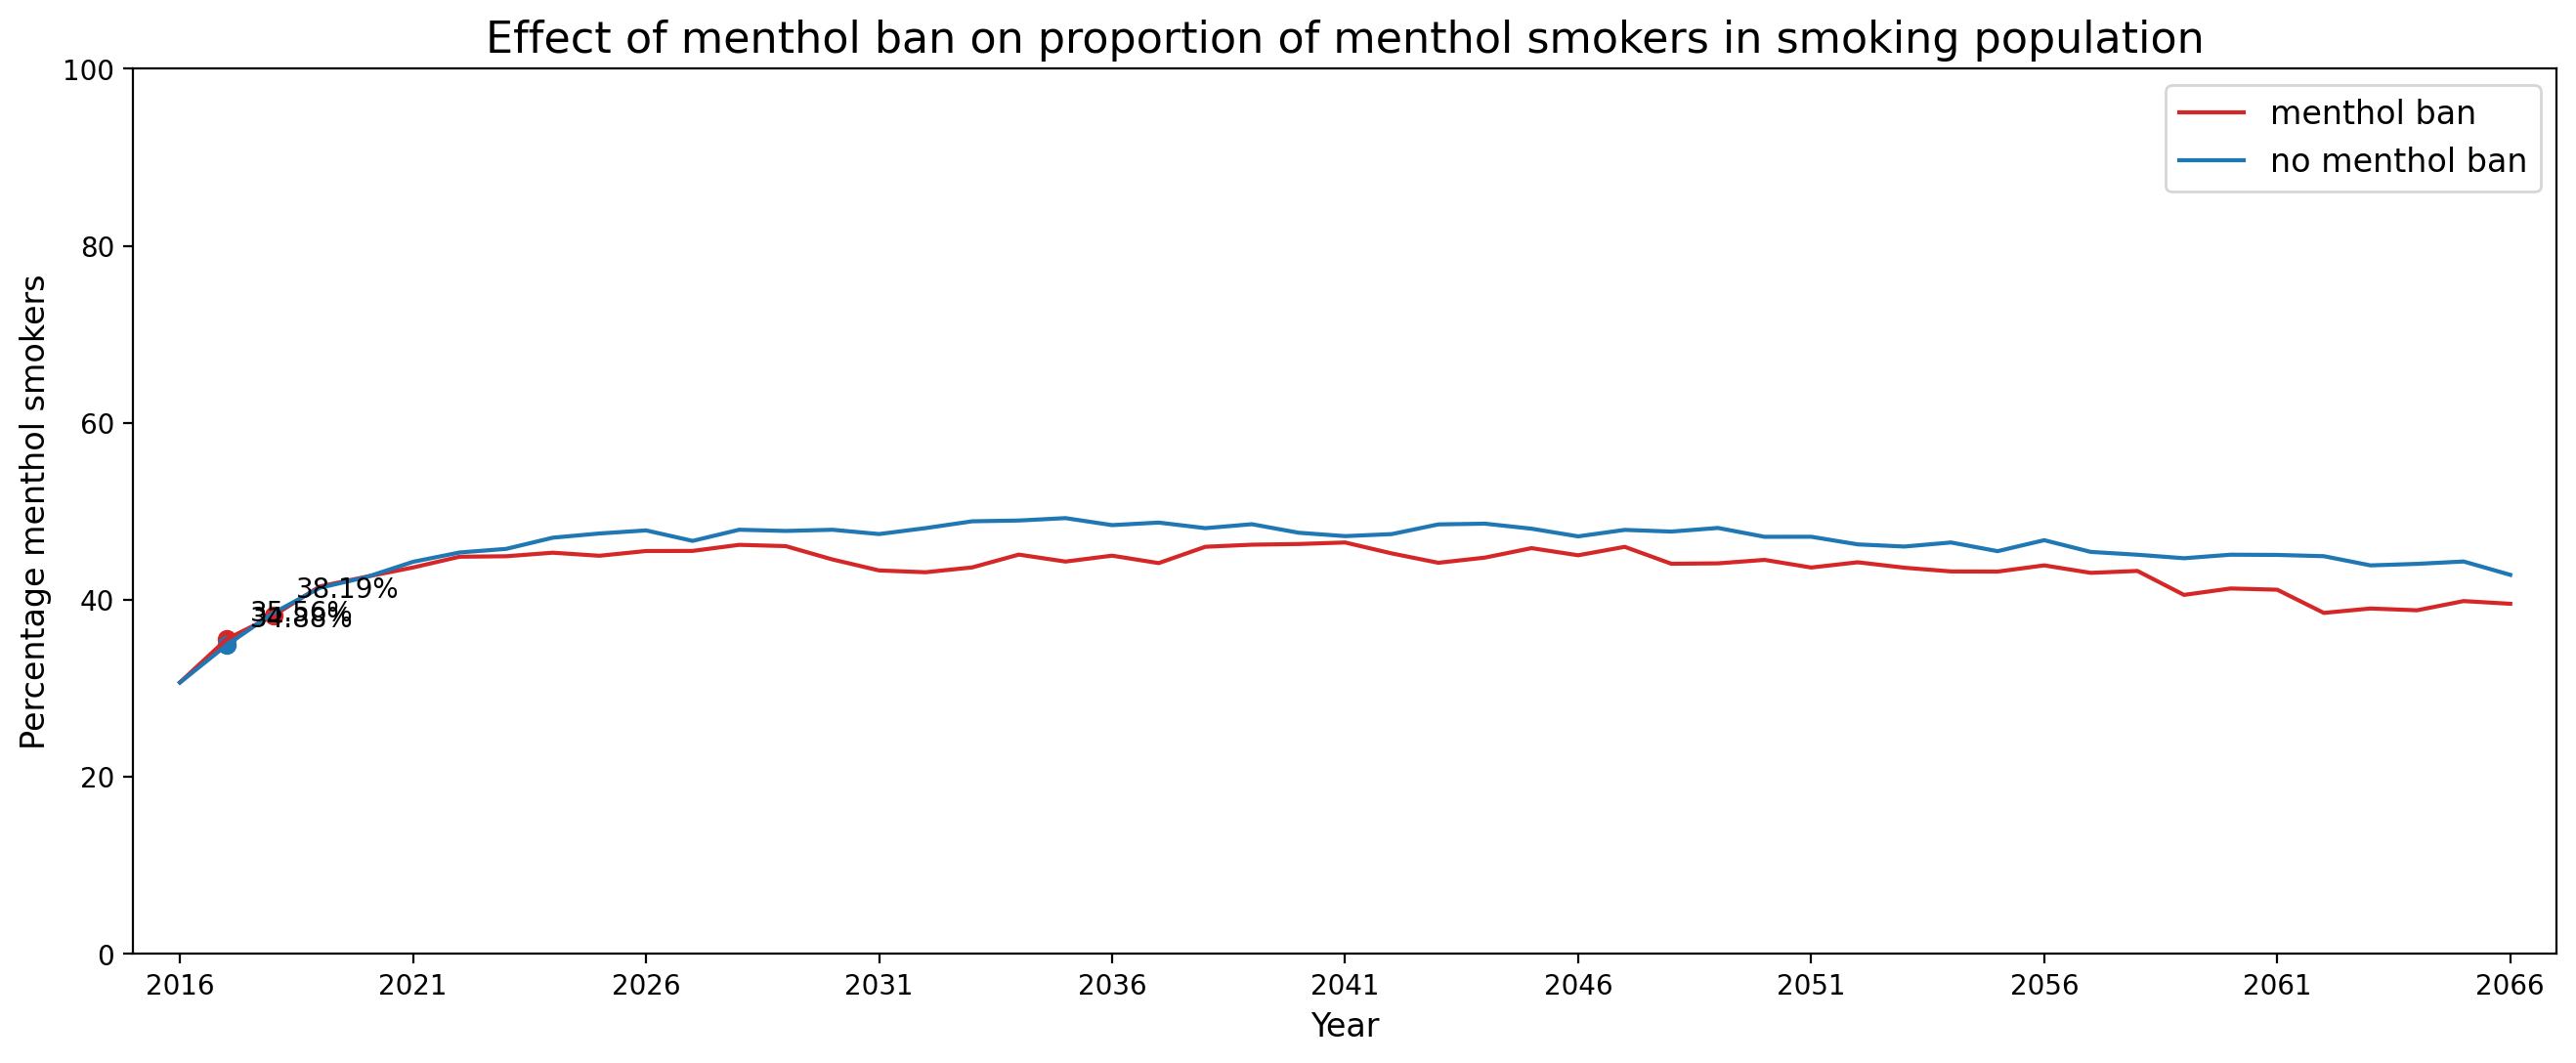

In [71]:
fig, ax = plt.subplots(1,1,figsize=(16,6), dpi=200)
y = arr_no_dead_percents[:,2] / np.sum(arr_no_dead_percents[:,2:], axis=1) * 100
y2 = arr2_no_dead_percents[:,2] / np.sum(arr2_no_dead_percents[:,2:], axis=1) * 100

ax.plot(x, y, mycolors[0])
ax.plot(x, y2, mycolors[1])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage menthol smokers", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
# ax.legend(["complex death rate", "average death rate"], fontsize=12, ncol=1)
ax.legend(["menthol ban", "no menthol ban"], fontsize=12, ncol=1)
for i,j in zip(x, y):
    # if (i - 2016) % 5 == 0:
    if i == 2017 or i == 2018:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i + 0.5,j + 2))
        ax.scatter([i],[j],c=mycolors[0])
for i,j in zip(x, y2):
    # if (i - 2016) % 5 == 0:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i + 0.5,j + 2))
        ax.scatter([i],[j],c=mycolors[1])

plt.title("Effect of menthol ban on proportion of menthol smokers in smoking population", fontsize=16)